<a href="https://colab.research.google.com/github/khushgrover/smart-match/blob/main/pgn_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/Engineering-Course/CIHP_PGN.git"

Cloning into 'CIHP_PGN'...
remote: Enumerating objects: 4363, done.
remote: Total 4363 (delta 0), reused 0 (delta 0), pack-reused 4363
Receiving objects: 100% (4363/4363), 830.35 KiB | 13.18 MiB/s, done.
Resolving deltas: 100% (705/705), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
root_path = 'gdrive/My Drive/dataset/'

In [4]:
!mkdir CIHP_PGN/checkpoint

In [5]:
!cp -r "gdrive/My Drive/dataset/CIHP_pgn.zip" "CIHP_PGN/checkpoint"

In [6]:
!cd '/content/CIHP_PGN/checkpoint'; unzip 'CIHP_pgn.zip'

Archive:  CIHP_pgn.zip
   creating: CIHP_pgn/
  inflating: CIHP_pgn/checkpoint     
  inflating: CIHP_pgn/model.ckpt-593292.data-00000-of-00001  
  inflating: CIHP_pgn/model.ckpt-593292.index  
  inflating: CIHP_pgn/model.ckpt-593292.meta  


In [7]:
!cd '/content/CIHP_PGN/checkpoint'; rm 'CIHP_pgn.zip'

In [8]:
!cp "gdrive/My Drive/dataset/test2.jpg" "CIHP_PGN/datasets/CIHP/images"

In [9]:
import numpy as np
import imageio as ii
from PIL import Image
nxb_img   = Image.open('CIHP_PGN/datasets/CIHP/images/test2.jpg')      # This is your image.
 
# Reshape their label image to our size 
label_img = Image.open('CIHP_PGN/datasets/CIHP/labels/0005008.png')  # This is the label image from CIHP.
nxb_label_img = label_img.resize(nxb_img.size, Image.NEAREST)
nxb_label_img.save('CIHP_PGN/datasets/CIHP/labels/test2.png')

# Reshape their edge image to our size 
edge_img  = Image.open('CIHP_PGN/datasets/CIHP/edges/0005008.png')
nxb_edge_img  = edge_img.resize(nxb_img.size, Image.NEAREST)
nxb_edge_img.save('CIHP_PGN/datasets/CIHP/edges/test2.png')



In [10]:
# Reshape their label image to our size 
label_rev_img = Image.open('CIHP_PGN/datasets/CIHP/labels_rev/0005008.png')  # This is the label image from CIHP.
nxb_label_rev_img = label_rev_img.resize(nxb_img.size, Image.NEAREST)
nxb_label_img.save('CIHP_PGN/datasets/CIHP/labels_rev/test2.png')

In [11]:
%cd CIHP_PGN

/content/CIHP_PGN


In [12]:
%pwd

'/content/CIHP_PGN'

In [13]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [17]:
!python test_pgn.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(tuple(tensor_list)).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.range(limit).shuffle(limit).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(inpu

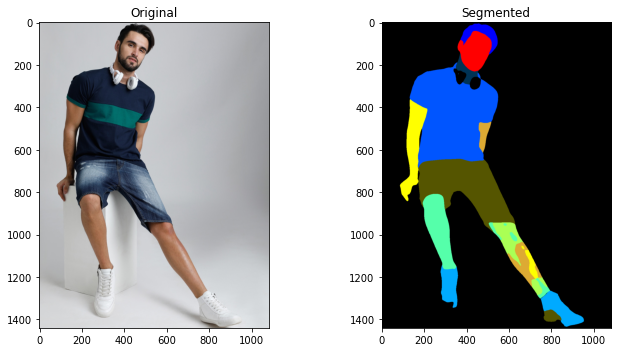

In [21]:
import matplotlib.pyplot as plt
import cv2

imageOriginal = cv2.imread('/content/CIHP_PGN/datasets/CIHP/images/test2.jpg')
imageOriginal = cv2.cvtColor(imageOriginal, cv2.COLOR_BGR2RGB)
imageSegment = cv2.imread('/content/CIHP_PGN/output/cihp_parsing_maps/test2_vis.png')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Original') 
ax1.imshow(imageOriginal)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Segmented') 
ax2.imshow(imageSegment)
plt.tight_layout()